In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-potability/water_potability.csv


### Feature Description

ph: pH of 1. water (0 to 14).

Hardness: Capacity of water to precipitate soap in mg/L.

Solids: Total dissolved solids in ppm.

Chloramines: Amount of Chloramines in ppm.

Sulfate: Amount of Sulfates dissolved in mg/L.

Conductivity: Electrical conductivity of water in μS/cm.

Organic_carbon: Amount of organic carbon in ppm.

Trihalomethanes: Amount of Trihalomethanes in μg/L.

Turbidity: Measure of light emiting property of water in NTU.

Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

In [91]:
data=pd.read_csv('/kaggle/input/water-potability/water_potability.csv')
data=pd.DataFrame(data)

In [23]:
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


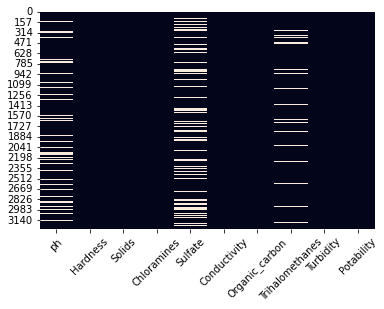

In [25]:
sns.heatmap(data.isnull(), cbar=False)
plt.xticks(rotation=45)
plt.show()

In [26]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [71]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

# 결측치 처리(ph, Sulfate, Trihalomethanes)

- 1. dropna(null값을 포함한 데이터는 drop한다) => 데이터가 1526개로 약 절반가량으로 줄어든다.=> RandomForest 정확도가 상대적으로 낮다
- 2. null값이 있는 column을 drop한다.=> feature가 9개에서 6개로 줄어든다.=> RamdomForest 정확도가 상대적으로 낮다
- 3. Feature의 평균값 또는 중앙값으로 대체한다.=> RandomForest 정확도가 상대적으로 높다.

In [92]:
# 결측치 평균값으로 대체-1

data.loc[(data['Potability'] == 0) & (data['ph'].isna()), 'ph'] = data[data['Potability'] == 0]['ph'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['ph'].isna()), 'ph'] = data[data['Potability'] == 1]['ph'].mean(skipna=True)


data.loc[(data['Potability'] == 0) & (data['Sulfate'].isna()), 'Sulfate'] = data[data['Potability'] == 0]['Sulfate'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['Sulfate'].isna()), 'Sulfate'] = data[data['Potability'] == 1]['Sulfate'].mean(skipna=True)


data.loc[(data['Potability'] == 0) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = data[data['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = data[data['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)

In [ ]:
# 결측치 중앙값으로 대체-2

#data.loc[(data['Potability'] == 0) & (data['ph'].isna()), 'ph'] = data[data['Potability'] == 0]['ph'].median(skipna=True)
#data.loc[(data['Potability'] == 1) & (data['ph'].isna()), 'ph'] = data[data['Potability'] == 1]['ph'].median(skipna=True)


#data.loc[(data['Potability'] == 0) & (data['Sulfate'].isna()), 'Sulfate'] = data[data['Potability'] == 0]['Sulfate'].median(skipna=True)
#data.loc[(data['Potability'] == 1) & (data['Sulfate'].isna()), 'Sulfate'] = data[data['Potability'] == 1]['Sulfate'].median(skipna=True)


#data.loc[(data['Potability'] == 0) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = data[data['Potability'] == 0]['Trihalomethanes'].median(skipna=True)
#data.loc[(data['Potability'] == 1) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = data[data['Potability'] == 1]['Trihalomethanes'].median(skipna=True)

### OverSampling 적용해보기

In [93]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [94]:
data.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [95]:
X_train,X_test,y_train,y_test=train_test_split(data, data, test_size=0.2, random_state=0)

In [96]:
X_train.shape, X_test.shape

((2620, 10), (656, 10))

In [97]:
X_train.Potability.value_counts()

0    1586
1    1034
Name: Potability, dtype: int64

In [98]:
notpotable  = X_train[X_train['Potability']==0]
potable = X_train[X_train['Potability']==1]  

from sklearn.utils import resample
df_minority_upsampled = resample(potable, replace = True, n_samples = 1586) 

from sklearn.utils import shuffle
X_train = pd.concat([notpotable, df_minority_upsampled])
X_train = shuffle(X_train) 

In [99]:
X_train.Potability.value_counts()

1    1586
0    1586
Name: Potability, dtype: int64

In [100]:
y_train = X_train.iloc[:, -1]
y_test = X_test.iloc[:, -1]
X_train = X_train.iloc[:, :-1]
X_test = X_test.iloc[:,:-1]

In [101]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3172, 9), (3172,), (656, 9), (656,))

In [102]:
from sklearn.preprocessing import StandardScaler
sclaer=StandardScaler()
X_train=sclaer.fit_transform(X_train)
X_test=sclaer.transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [103]:
X_train=X_train.rename(columns={0:'ph',1:'Hardness', 2:'Solids',3:'Chloramines',4:'Sulfate', 5:'Conductivity',6:'Organic_carbon',7:'Trihalomethanes', 8:'Turbidity'})
X_test=X_test.rename(columns={0:'ph',1:'Hardness', 2:'Solids',3:'Chloramines',4:'Sulfate', 5:'Conductivity',6:'Organic_carbon',7:'Trihalomethanes', 8:'Turbidity'})

### Machine Learning
- Modeling

In [104]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3172, 9), (656, 9), (3172,), (656,))

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


models_acc = []
models = [DecisionTreeClassifier(), LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), GaussianNB(), SVC()]
for model in models:
    model.fit(X_train, y_train)    
    pred = model.predict(X_test)
    models_acc.append(accuracy_score(y_test, pred))

In [106]:
Model_list = pd.DataFrame({
    'Model Accuracy': models_acc, 
    "Model Name": ['DecisionTreeClassifier','LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GaussianNB', 'SVC']
})
Model_list

,Model Accuracy,Model Name
0,0.754573,DecisionTreeClassifier
1,0.528963,LogisticRegression
2,0.568598,KNeighborsClassifier
3,0.809451,RandomForestClassifier
4,0.591463,GaussianNB
5,0.653963,SVC


### Gridsearch

In [107]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=0)
#파라미터 후보 - 딕셔너리(key: 하이퍼 파라미터 이름, value: 후보리스트)
param_grid = {
    'n_estimators':[100,200,350,500],
    'max_depth':[6, 8, 10, 12, 14],
    'min_samples_leaf':[5 ,10, 20, 30]
}

grid_search = GridSearchCV(rfc, #모델
                           param_grid=param_grid, #하이퍼 파라미터 후보
                           scoring='accuracy',# 평가 지표
                           cv=5, # cross validation의 fold 개수
                           n_jobs=-1) # 사용할 cpu의 개수: -1은 모든 cpu 전부 사용(병렬 학습)

In [108]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12, 14],
                         'min_samples_leaf': [5, 10, 20, 30],
                         'n_estimators': [100, 200, 350, 500]},
             scoring='accuracy')

In [109]:
df = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')#.filter(like='rank')
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
67,3.888672,0.122134,0.144939,0.021375,14,5,500,"{'max_depth': 14, 'min_samples_leaf': 5, 'n_es...",0.867717,0.864567,0.859621,0.858044,0.856467,0.861283,0.004210,1
65,1.538265,0.040511,0.054655,0.002841,14,5,200,"{'max_depth': 14, 'min_samples_leaf': 5, 'n_es...",0.862992,0.867717,0.856467,0.858044,0.854890,0.860022,0.004710,2
66,2.758752,0.162734,0.090399,0.003679,14,5,350,"{'max_depth': 14, 'min_samples_leaf': 5, 'n_es...",0.867717,0.862992,0.853312,0.856467,0.853312,0.858760,0.005705,3
64,0.759303,0.013286,0.027313,0.000633,14,5,100,"{'max_depth': 14, 'min_samples_leaf': 5, 'n_es...",0.855118,0.853543,0.848580,0.845426,0.856467,0.851827,0.004167,4
51,3.932734,0.293474,0.147600,0.047711,12,5,500,"{'max_depth': 12, 'min_samples_leaf': 5, 'n_es...",0.853543,0.855118,0.842271,0.853312,0.850158,0.850881,0.004596,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,2.180522,0.141477,0.082459,0.003957,6,20,350,"{'max_depth': 6, 'min_samples_leaf': 20, 'n_es...",0.801575,0.779528,0.771293,0.769716,0.779180,0.780258,0.011381,76
13,1.137699,0.015373,0.046005,0.001434,6,30,200,"{'max_depth': 6, 'min_samples_leaf': 30, 'n_es...",0.798425,0.779528,0.777603,0.766562,0.777603,0.779944,0.010313,77
15,2.916532,0.149622,0.115345,0.008700,6,30,500,"{'max_depth': 6, 'min_samples_leaf': 30, 'n_es...",0.790551,0.774803,0.776025,0.771293,0.783912,0.779317,0.006970,78
14,1.976030,0.016309,0.079053,0.003407,6,30,350,"{'max_depth': 6, 'min_samples_leaf': 30, 'n_es...",0.792126,0.776378,0.772871,0.764984,0.780757,0.777423,0.008987,79


In [110]:
grid_search.best_score_

0.8612831913360989

In [111]:
grid_search.best_params_

{'max_depth': 14, 'min_samples_leaf': 5, 'n_estimators': 500}

In [117]:
best_model = grid_search.best_estimator_
accuracy_score(y_test, best_model.predict(X_test))

0.7957317073170732

In [118]:
pred=best_model.predict(X_test)

In [114]:
print("Accuracy:", accuracy_score(y_test, pred)*100,'%') 
print("Recall:", recall_score(y_test, pred)*100,'%') 
print('Precision:',precision_score(y_test, pred)*100, '%') 
print('f1 score:',f1_score(y_test, pred)*100, '%')

Accuracy: 79.57317073170732 %
Recall: 63.52459016393443 %
Precision: 77.5 %
f1 score: 69.81981981981981 %


In [115]:
fi=best_model.feature_importances_
fi=pd.Series(fi, index=X_train.columns)
fi

ph                 0.208297
Hardness           0.076721
Solids             0.077504
Chloramines        0.071634
Sulfate            0.356290
Conductivity       0.053803
Organic_carbon     0.056573
Trihalomethanes    0.053074
Turbidity          0.046104
dtype: float64

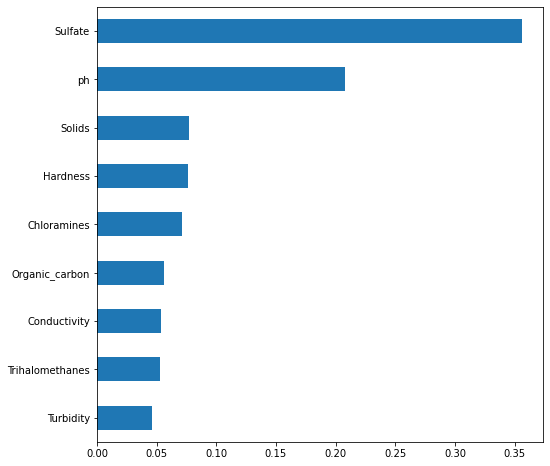

In [116]:
fi.sort_values().plot(kind='barh', figsize=(8,8))
plt.show()